# Preface

#### Milestone 1

Nama : Fahmi

Batch : RMT-034

Objective:
Project ini dilakukan untuk menganalisis hal-hal yang bisa meningkatkan penjualan komoditas di e-commerce.

URL Dashboard = https://public.tableau.com/views/MilestoneFahmi1/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

URL Kaggle = https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/data

# Identifikasi Masaslah

## Latar Belakang & Topik Permasalahan

Sebagai seorang Data Analyst, saya ditugaskan untuk menyelesaikan suatu permasalahan client dari India. Mereka mengharapkan sekali hasil analisis data menggunakan statistik dan dashboard visualisasi. Itu dilakukan demi menyelesaikan masalah mereka, yakni peningkatan penjualan pakaian mereka di e-commerce Amazon India.

## Mendefinisikan Problem Statements

Dengan menggunakan framework SMART

1. **Spesific**: Meningkatkan volume penjualan pakaian di platform e-commerce Amazon India

2. **Measureable**: Meningkatkan jumlah transaksi (number of transacsitions) sebanyak 20 persen

3. **Achievable**: Melakukan riset pasar, memberikan penawaran menarik (diskon, product bundling), melakukan evalusi produk yang beredar

4. **Relevant**: Meningkatkan volume penjualan berdampak pada bertambahnya omzet

5. **Time Bound**: Tercapai pada semester depan (6 bulan lagi)


`Problem Statement`:

Golnya ialah meningkatkan volume penjualan di e-commerce Amazon India dengan menargetkan peningkatkan jumlah transaksi hingga 20 persen pada 6 bulan mendatang. Itu bisa tercapai jika dilakukan riset pasar, pemberian penawaran menarik, dan melakukan evaluasi produk yang beredar, yang pada akhirnya dapat meningkatkan omzet.


`Business Metric`:

- Kolom `Amount` = berisi besaran total belanja pada setiap transaksi. 

- Kolom  `Qty` = berisi jumlah barang pesanan setiap transaksi.

## Penjabaran Masalah

Problem utama: `Meningkatkan jumlah transaksi sebagai metrik dari volume penjualan`

Untuk itu, pertama-tama kita perlu memahami detail dari problem dengan menggunakan framework 5W + 1 H sebagai berikut.

- Kategori produk apa yang paling diminati? Yang paling tidak diminati? (deskriptif)
- Faktor apa saja yang mempengaruhi peningkatan jumlah transaksi? (inferential)
- Bagaimana kebiasaan customer saat membeli? (deskriptif)
- Berapa jumlah transaksi (number of sales transacsition)? (visualisasi)
- Berapa sales volume berdasarkan kategori produk (sales volume by product category)? (visualisasi)
- Berapa sales volume berdasarkan periode waktu (sales volume by time period)? (visualisasi)
- Berapa sales volume berdasarkan location (sales volume by location)? (visualisasi)

# Data Loading

## Libraries

Pertama-tama, kita meng-import dahulu sejumlah pustaka dan modul yang kita butuhkan nantinya

In [1]:
# Import pustaka pandas untuk memanipulasi data
import pandas as pd

# Import fungsi chi2_contingency dari pustaka scipy stats
from scipy.stats import chi2_contingency

# import matplotlib untuk membuat grafik atau chart
import matplotlib.pyplot as plt

# import seaborn untuk membuat grafik atau chart
import seaborn as sns

## Mengakses Data

Kita mengakses file csv `Amazon Sale Report` untuk selanjutnya nanti diolah dan digunakan pada analisis ini.

In [2]:
# File CSV dibuatkan dataframe bernama `transaksi_df` 
transaksi_df = pd.read_csv("Amazon Sale Report.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4040\4167836290.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  transaksi_df = pd.read_csv("Amazon Sale Report.csv")


Berikut tampilan dari dataframe `transaksi_df` beserta kolom-kolom dan value-value-nya

In [3]:
# Tampilkan 5 sampelnya
transaksi_df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
48634,48634,408-0310159-5341929,04-01-22,Shipped,Amazon,Amazon.in,Standard,SET349,SET349-KR-NP-L,Set,...,INR,0.0,CHANDIGARH,CHANDIGARH,160047.0,IN,NaN,False,NaN,NaN
55240,55240,407-0480049-5369114,05-27-22,Shipped,Amazon,Amazon.in,Expedited,SET316,SET316-KR-DPT-XXXL,Set,...,INR,1238.0,THIRUVANANTHAPURAM,KERALA,695024.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
117192,117192,404-2663032-6743526,06-08-22,Shipped,Amazon,Amazon.in,Expedited,SET304,SET304-KR-DPT-XS,Set,...,INR,1125.0,BENGALURU,KARNATAKA,560103.0,IN,NaN,False,NaN,False
42538,42538,408-5354743-5715564,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3645,JNE3645-TP-N-XL,Top,...,NaN,NaN,BENGALURU,KARNATAKA,560066.0,IN,NaN,False,NaN,NaN
89787,89787,403-1221931-7554742,05-01-22,Shipped,Amazon,Amazon.in,Expedited,JNE3805,JNE3805-KR-S,kurta,...,INR,459.0,TIRUCHIRAPPALLI,TAMIL NADU,620019.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


Terlihat ada sejumlah kolom yang tak memiliki nilai atau bernilai NaN/None (biasa disebut sebagai missing value). Untuk lebih jelasnya kita lihat summary/ ringkasan informasi kolom sebagai berikut.

In [4]:
# Mengecek summary informasi dataframe
transaksi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

- Terlihat dari summary di atas, terdapat 23 kolom dengan jumlah baris sebanyak 128.975. 
- Kolom `Date` masih bertipe object. Untuk itu, nantinya perlu diubah menjadi tipe `datetime`.
- Kemudian, dari kolom `Date` tersebut akan diekstrak bulan dan tahunnya untuk menjadi kolom baru, `Month` dan `Year`. 
- Kedua kolom itu akan memudahkan saat analisis yang menggunakan waktu sebagai acuan.

Untuk memudahkan coding, kita perlu memastikan nama kolom, apakah sudah konsisten atau tidak, seperti ada spasi di awal atau akhir penamaannya.

In [5]:
# Mengecek penulisan nama kolom
transaksi_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

Diketahui bahwa penulisan kolom `Sales Channel` masih memiliki whitespace pada bagian akhirnya, maka perlu dilakukan cleaning

Selanjutnya mengecek missing value, kolom mana saja yang memiliki missing value dan berapa banyak. 

In [6]:
# Mengecek missing value
transaksi_df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

- Dari summary di atas, tampak banyak kolom yang memiliki missing value yang nantinya perlu kita handling.

- Adapun khusus untuk kolom `index`,`Unnamed: 22`, `fulfilled-by`, dan `promotion-ids`, saya merasa kolom-kolom itu tidak esensial sehingga lebih baik dihapus.

- Saya juga menghapus kolom `ASIN`. ASIN sendiri merupakan singkatan dair Amazon Standar Identification Number yang berupa kode alfanumerik yang dikeluarkan Amazon sendiri mengidentifikasi produk. Sementara itu, di dataset itu, sudah memiliki identifikasi produk lain, yakni SKU.

- Saya pun memutuskan untuk menghapus kolom `ship-city` dan `ship-postal-code` karena sudah diwakili dengan `ship-state` dan `ship-country`

Selanjutnya saya berasumsi bahwa kolom `currency` (mata uang) tidak penting karena transaksi kebanyakan menggunakan mata uang INR (Rupee India). Mari kita buktikan

In [7]:
# Cek unique value `currency`
transaksi_df['currency'].unique()

array(['INR', nan], dtype=object)

Hasilnya benar-benar hanya INR dan selebihnya missing value. Maka itu, saya juga memutuskan akan menghapus kolom `currency`.

Hasilnya benar-benar hanya INR dan selebihnya missing value. Maka itu, saya memutuskan pula untuk menghapus kolom `ship-country`.

Berikutnya, kita akan mengecek apakah ada data duplikat dari dataframe `transaksi_df`

In [8]:
# Cek duplicated value
transaksi_df.duplicated().sum()

0

Walhasil tidak ada data duplikat sehingga tidak diperlukan handling untuk duplicated value pada tahap selanjutnya.

Kita beranjak ke lingkup yang lebih kecil, yakni values. Ada 2 kejanggalan yang saya temukan:

1. Pesanan yang status pengirimannya `Shipped` atau sudah terkirim, tetapi besaran total belanjanya (`Amount`) = 0.  Misalnya berikut ini

In [9]:
# mengecek kejanggalan row dengan `status` == `shipped`, tetapi `amount` == 0
transaksi_df[(transaksi_df.Status == 'Shipped') & (transaksi_df.Amount == 0)][['Order ID', 'Status', 'Fulfilment','Courier Status','Amount']].head(5)

,Order ID,Status,Fulfilment,Courier Status,Amount
385,408-3137526-3167563,Shipped,Amazon,Shipped,0.0
392,408-0912805-7526753,Shipped,Amazon,Shipped,0.0
436,408-6466311-6949931,Shipped,Amazon,Shipped,0.0
446,408-7937211-8974712,Shipped,Amazon,Shipped,0.0
449,408-6348199-2089932,Shipped,Amazon,Shipped,0.0


2. Pesanan yang status pengirimannya `Cancelled` atau dibatalkan, tetapi besaran total belanjanya (`Amount`) != (bukanlah) 0 sebagai berikut.

In [10]:
# Mengecek kejanggalan row dengan `status` == `cancelled`, tetapi `amount` != 0
transaksi_df[(transaksi_df['Status'] == 'Cancelled') & (transaksi_df.Amount != 0)][['Order ID', 'Status', 'Fulfilment','Courier Status','Amount']].head()

,Order ID,Status,Fulfilment,Courier Status,Amount
0,405-8078784-5731545,Cancelled,Merchant,NaN,647.62
3,403-9615377-8133951,Cancelled,Merchant,NaN,753.33
8,407-5443024-5233168,Cancelled,Amazon,Cancelled,NaN
23,404-6019946-2909948,Cancelled,Merchant,NaN,570.48
29,404-5933402-8801952,Cancelled,Merchant,NaN,NaN


Lalu ada berapa bariskah yang memiliki 2 kejanggalan berikut? Mari kita hitung.

In [11]:
# Mengecek banyaknya row yang sesuai dengan kedua kondisi tersebut
transaksi_df.value_counts([((transaksi_df.Status == 'Cancelled') & (transaksi_df.Amount != 0)) | (transaksi_df.Status == 'Shipped') & (transaksi_df.Amount == 0)])

False    109125
True      19850
Name: count, dtype: int64

Total ada 19.850 yang memiliki kejanggalan. Ke depannya, kita akan menghapus baris-baris tersebut. Karena selain agar analisis kita bisa seakurat mungkin, jumlah puluhan ribu itu tidak akan terlalu mempengaruhi analisis kita yang masih memiliki ratusan ribu baris lainnya. 

Syahdan, kita mengecek penulisan pada kolom. Saya menduga ada ketidakkonsistenan pada kapitalisasi penulisan value di kolom `ship-state`.

In [12]:
# mengecek adakah baris yang memenuhi salah satu kondisi di bawah ini
transaksi_df[(transaksi_df['ship-state'] == 'rajasthan') | (transaksi_df['ship-state'] == 'Rajasthan')][['Category', 'ship-state']].sample(5)

,Category,ship-state
108977,Set,Rajasthan
66184,Set,Rajasthan
45082,Set,Rajasthan
19633,Top,Rajasthan
23728,kurta,Rajasthan


- Ada yang penulisannya `Rajasthan`, ada pula yang `rajasthan`. Untuk itu, perlu disamakan.
- Saya pun akan melakukan persamaan case penulisan untuk kolom `Category` agar lebih rapi karena seperti yang dilihat di atas, penulisan `kurta` dan `Set` tidak seragam.

Berikutnya, saya akan mengecek values yang tidak konsisten. Mungkin sebenarnya maksudnya sama, tetapi bentuk penulisannya berbeda

In [13]:
# cek unique value beserta frekuensi kemunculannya
transaksi_df['ship-state'].value_counts()

ship-state
MAHARASHTRA               22260
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: count, Length: 69, dtype: int64

Diketahui sejumlah values sebenarnya memiliki maksud yang sama, tetapi ternyata dianggap merupakan value yang berbeda pada dataframe ini, seperti state `Orissa` yang merupakan nama di masa lalu dari `Odisha`. Atau juga seperti `New Delhi` yang dimaksud dalam konteks ini ialah `Delhi` selaku state. 

# Data Cleaning

## Menghapus kolom yang tak diperlukan 

- Seperti yang kita rencanakan sebelumnya, kita akan menghapus 8 kolom yang kita anggap tidak penting dalam analiis ini. 

- Mereka ialah kolom 'Unnamed: 22','fulfilled-by','promotion-ids', 'currency', 'ASIN','index', 'ship-city', dan 'ship-postal-code'.

In [14]:
# Cek nama-nama kolom sebelum penghapusan
transaksi_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

Di atas adalah nama-nama kolom sebelum dihapus. Barulah kemudian, kita hapus.

In [15]:
# hapus kolom yang tidak diinginkan
transaksi_df = transaksi_df.drop(columns=['Unnamed: 22','fulfilled-by','promotion-ids', 'currency', 'ASIN','index', 'ship-city','ship-postal-code'])

In [16]:
# cek nama-nama kolom lagi setelah penghapusan
transaksi_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'Amount', 'ship-state', 'ship-country', 'B2B'],
      dtype='object')

Ke-8 kolom tersebut sudah benar-benar terhapus. Dengan begini, kita bisa lebih efektif dalam menganalisis. 

## Mengganti Tipe Data Kolom Date

Sebelum itu, mari kita lihat tipe kolom `Date`

In [17]:
# cek tipe data kolom `date`
transaksi_df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-state             object
ship-country           object
B2B                      bool
dtype: object

Kolom `Date` terlihat masih bertipe object. Mari kita ubah lalu cek kembali tipe datanya.

In [18]:
# mengubah tipe data Date
transaksi_df['Date'] = pd.to_datetime(transaksi_df['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4040\3166512315.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transaksi_df['Date'] = pd.to_datetime(transaksi_df['Date'])


In [19]:
# cek tipe data kolom `date`
transaksi_df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
Amount                       float64
ship-state                    object
ship-country                  object
B2B                             bool
dtype: object

Kini, kolom `Date` sudah bertipe `datetime`.

##  Menambahkan Kolom Year dan Month

Sebelumnya, mari kita lihat tampilan dataframe terlebih dahulu.

In [20]:
# mengecek sampel sebelum perubahan
transaksi_df.sample(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-state,ship-country,B2B
71226,403-0602325-7050722,2022-05-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET322,SET322-KR-SHA-L,Set,L,Shipped,1,1099.00,BIHAR,IN,False
66688,408-5267336-1775543,2022-05-17,Shipped,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-M,Set,M,Shipped,1,0.00,KARNATAKA,IN,False
74562,404-6782834-5135552,2022-05-11,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XL,Top,XL,Shipped,1,545.00,MAHARASHTRA,IN,False
101387,407-0537507-9275547,2022-06-20,Cancelled,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XXXL,Western Dress,3XL,NaN,0,690.48,Gujarat,IN,False
22592,406-7779042-3907539,2022-04-17,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET217,SET217-KR-PP-XXXL,Set,3XL,Shipped,1,825.00,KARNATAKA,IN,False


Lalu kita tambahkan kolom `Year` dan `Month` lalu cek kembali untuk melihat perubahannya.

In [21]:
# Menambah kolom bulan dan tahun
transaksi_df['Year'] = transaksi_df['Date'].dt.year
transaksi_df['Month'] = transaksi_df['Date'].dt.month

# cek sampel dataframe kembali
transaksi_df.sample(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-state,ship-country,B2B,Year,Month
91438,406-3380662-9728336,2022-06-29,Cancelled,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XL,Western Dress,XL,Cancelled,0,NaN,ANDHRA PRADESH,IN,False,2022,6
81819,403-2541988-2857964,2022-05-05,Shipped,Amazon,Amazon.in,Expedited,SET374,SET374-KR-NP-S,Set,S,Shipped,1,626.0,TELANGANA,IN,False,2022,5
15980,407-2632101-8857952,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,JNE2014,JNE2014-KR-178-L,kurta,L,Shipped,1,353.0,WEST BENGAL,IN,False,2022,4
107774,171-6755758-5367525,2022-06-15,Cancelled,Amazon,Amazon.in,Expedited,SET304,SET304-KR-DPT-XS,Set,XS,Cancelled,0,NaN,KERALA,IN,False,2022,6
119747,407-1462869-6805961,2022-06-07,Shipped,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-XXL,Set,XXL,Shipped,1,759.0,TELANGANA,IN,False,2022,6


Kolom `Year` dan `Month` sudah muncul dan siap kita pakai untuk analisis.

## Menghapus Whitespace pada Nama Kolom

Berikut penulisan kolom yang semula:

In [22]:
# cek kembali penulisan nama kolomnya
transaksi_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'Amount', 'ship-state', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

Kolom `Sales Channel` memiliki whitespace pada bagian belakangnya. Untuk itu, kita hapus lalu kita cek kembali.

In [23]:
# memastikan tidak ada whitespace di nama columns
transaksi_df.columns = transaksi_df.columns.str.strip()

# cek kembali penulisan nama kolomnya
transaksi_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'Amount', 'ship-state', 'ship-country', 'B2B',
       'Year', 'Month'],
      dtype='object')

Nama kolom `Sales Channel` kini sudah tidak lagi memiliki whitespace di belakangnya.

## Merapikan Penulisan Kapitalisasi

Seperti rencana, kita akan menyamakan kapitalisasi pada penulisan values di kolom `Category` dan `ship-state`. Namun sebelumnya, mari kita cek tampilan semulanya.

In [24]:
# mengecek kapitalisasi penulisan values kolom `Category` dan `ship-state`
transaksi_df[(transaksi_df['ship-state'] == 'rajasthan') | (transaksi_df['ship-state'] == 'Rajasthan')][['Category', 'ship-state']].sample(5)

,Category,ship-state
47904,kurta,Rajasthan
66614,kurta,Rajasthan
82849,Set,Rajasthan
9693,Top,rajasthan
19633,Top,Rajasthan


Mari kita ubah dan cek kembali sebagai berikut.

In [25]:
# Merapikan besar huruf values
transaksi_df['Category'] = transaksi_df['Category'].str.title()
transaksi_df['ship-state'] = transaksi_df['ship-state'].str.title()

# mengecek kembali kapitalisasi penulisan values kolom `Category` dan `ship-state`
transaksi_df[(transaksi_df['ship-state'] == 'rajasthan') | (transaksi_df['ship-state'] == 'Rajasthan')][['Category', 'ship-state']].sample(5)

,Category,ship-state
18867,Kurta,Rajasthan
64403,Kurta,Rajasthan
10330,Set,Rajasthan
102808,Set,Rajasthan
76375,Set,Rajasthan


Sekarang kapitalisasi penulisan di kedua kolom tersebut sudah seragam. Langkah tersebut juga mengurangi beban saat melakukan handling data inkonsisten setelah ini.

## Handling Data Inkonsisten

Sebelum kita mengubah values yang tidak konsisten. Berikut saya tampilkan kembali valuesnya.

In [26]:
# cek konsistensi values
transaksi_df['ship-state'].value_counts()

ship-state
Maharashtra               22260
Karnataka                 17326
Tamil Nadu                11483
Telangana                 11330
Uttar Pradesh             10638
Delhi                      6967
Kerala                     6585
West Bengal                5963
Andhra Pradesh             5430
Gujarat                    4489
Haryana                    4415
Rajasthan                  2711
Madhya Pradesh             2529
Odisha                     2136
Bihar                      2114
Punjab                     1917
Assam                      1663
Uttarakhand                1553
Jharkhand                  1456
Goa                        1137
Chhattisgarh                909
Himachal Pradesh            788
Jammu & Kashmir             702
Puducherry                  350
Chandigarh                  333
Manipur                     316
Andaman & Nicobar           257
Meghalaya                   207
Sikkim                      205
Nagaland                    185
Tripura                     1

- Masih terdapat values yang maksudnya sama tetapi, ternyata dibedakan karena tidak konsisten penulisannya. Seperti di atas, `Punjab/Mohali/Zirakpur` yang merujuk kepada `Punjab`.

- Maka itu, mari kita ubah dan kita cek kembali

In [27]:
# mengubah values yang inkonsisten
transaksi_df['ship-state'] = transaksi_df['ship-state'].replace({
    'Nl':'Nagaland', 
    'Orissa':'Odisha',
    'Pondicherry':'Puducherry',
    'Ar':'Arunachal Pradesh',
    'Rajshthan':'Rajasthan',
    'Rajsthan':'Rajasthan',
    'Rj':'Rajasthan',
    'Pb':'Punjab',
    'Punjab/Mohali/Zirakpur':'Punjab',
    'New Delhi':'Delhi'
    }, regex=False)

In [28]:
# cek konsistensi values
transaksi_df['ship-state'].value_counts()

ship-state
Maharashtra           22260
Karnataka             17326
Tamil Nadu            11483
Telangana             11330
Uttar Pradesh         10638
Delhi                  7048
Kerala                 6585
West Bengal            5963
Andhra Pradesh         5430
Gujarat                4489
Haryana                4415
Rajasthan              2718
Madhya Pradesh         2529
Odisha                 2139
Bihar                  2114
Punjab                 1919
Assam                  1663
Uttarakhand            1553
Jharkhand              1456
Goa                    1137
Chhattisgarh            909
Himachal Pradesh        788
Jammu & Kashmir         702
Puducherry              351
Chandigarh              333
Manipur                 316
Andaman & Nicobar       257
Meghalaya               207
Sikkim                  205
Nagaland                187
Tripura                 151
Arunachal Pradesh       147
Mizoram                  76
Dadra And Nagar          70
Ladakh                   43
Lakshadwe

Nama kolom `ship-state` sudah bersih dan tidak lagi ada yang tidak konsisten.

## Menghapus Data Janggal

Pada tahap ini, kita akan menghapus values yang memiliki dua kondisi:

1. Pesanan yang status pengirimannya `Shipped` atau sudah terkirim, tetapi besaran total belanjanya (`Amount`) = 0. 

2. Pesanan yang status pengirimannya `Cancelled` atau dibatalkan, tetapi besaran total belanjanya (`Amount`) != (bukanlah) 0.

Mari kita cek jumlah baris yang sesuai kedua kondisi di atas:

In [29]:
# menghitung jumlah baris menurut ke-2 kondisi yang ditentukan
transaksi_df.value_counts([((transaksi_df.Status == 'Cancelled') & (transaksi_df.Amount != 0)) | (transaksi_df.Status == 'Shipped') & (transaksi_df.Amount == 0)])

False    109125
True      19850
Name: count, dtype: int64

Terlihat ada 19 ribuan baris yang akan kita hapus. Mari kita lakukan dan cek kembali perubahannya.

In [30]:
# memanfaatkan operator NOT (~) untuk mengecualikan 2 kondisi itu 
kondisi = ~ (((transaksi_df.Status == 'Cancelled') & (transaksi_df.Amount != 0)) | (transaksi_df.Status == 'Shipped') & (transaksi_df.Amount == 0))

# memfilter dengan kondisi yang kita masukkan/definisikan  
transaksi_df = transaksi_df[kondisi]


In [31]:
# Mengecek ulang apakah masih ada yang tersisa
transaksi_df[((transaksi_df.Status == 'Cancelled') & (transaksi_df.Amount != 0)) | (transaksi_df.Status == 'Shipped') & (transaksi_df.Amount == 0)][['Order ID', 'Status', 'Fulfilment','Courier Status','Amount']]

,Order ID,Status,Fulfilment,Courier Status,Amount


Akhirnya, tidak ada lagi baris yang janggal karena memiliki kedua kondisi tersebut. Selain itu, mari kita lihat berapa banyak baris yang tersisa dari penghapusan sebelumnya.

In [32]:
# mengecek jumlah baris
transaksi_df.shape

(109125, 18)

Tersisa 109.125 baris yang lolos dari pemfilteran dengan 2 kondisi sebelumnya.

## Handling Missing Value

Bagian yang tidak boleh kita lupakan ialah menangani missing value. Berikut missing value yang ada pada dataframe kita

In [33]:
#cek missing value
transaksi_df.isna().sum()

Order ID                0
Date                    0
Status                  0
Fulfilment              0
Sales Channel           0
ship-service-level      0
Style                   0
SKU                     0
Category                0
Size                    0
Courier Status         11
Qty                     0
Amount                229
ship-state             26
ship-country           26
B2B                     0
Year                    0
Month                   0
dtype: int64

Terdapat 3 kolom yang memiliki missing value, yakni `Amount`, `Courier Status`, dan `ship-state`. Mari kita handling satu per satu.

### Handling Missing Value Kolom Amount

- Ada 226 baris yang kolom `Amount`-nya missing value. 

- Langkah pertama yang perlu kita lakukan ialah mencari penyebab di balik missing value tersebut, apakah ada hubungannya dengan kolom ini atau tidak.

In [34]:
# mengecek sampel baris yang kolom `Amount`-nya missing value
transaksi_df[transaksi_df.Amount.isna()].head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-state,ship-country,B2B,Year,Month
937,S02-5278980-4327051,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,Free,Unshipped,15,NaN,Gujarat,IN,False,2022,4
1057,S02-9107114-0460608,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,SET315,SET315-KR-PP-XL,Set,XL,Unshipped,2,NaN,Gujarat,IN,False,2022,4
1615,405-7790745-1369118,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,JNE3518,JNE3518-KR-M,Kurta,M,Cancelled,0,NaN,Uttarakhand,IN,False,2022,4
1989,171-9673855-2321133,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,SET232,SET232-KR-PP-S,Set,S,Cancelled,0,NaN,Haryana,IN,False,2022,4
2424,404-7478762-7926753,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,SET331,SET331-KR-NP-S,Set,S,Cancelled,0,NaN,Rajasthan,IN,False,2022,4


- Terlihat bahwa nilai `Amount` yang kosong ternyata disebabkan 2 kondisi tertentu saat di tangan kurir. Itu ditunjukkan pada kolom `Courier Status`. 
- Ada yang karena memang belum dikirimkan oleh kurir (Unshipped) dan di-cancel.
- Untuk itu, saya akan mengganti nilai NaN pada kolom `Amount` itu dengan 0. 

In [35]:
# memasukkan 0 untuk data `Amount` yang missing value
transaksi_df.Amount = transaksi_df.Amount.fillna(0)

In [36]:
# mengecek kembali adakah baris yang kolom `Amount`-nya missing value
transaksi_df['Amount'].isna().sum()

0

Sudah tidak ada lagi baris yang kolom `Amount`-nya missing value.

### Handling Missing Value Kolom Courier Status

- Ada 11 baris yang kolom `Courie Status`-nya mi11ng value. 

- Seperti sebelumnya, kita perlu mencari penyebab di balik missing value tersebut, apakah ada hubungannya dengan kolom ini atau tidak.

In [37]:
# mengecek baris yang kolom `Courier Isna` missing value
transaksi_df[transaksi_df['Courier Status'].isna()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-state,ship-country,B2B,Year,Month
18894,408-2656493-8935504,2022-04-19,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET278,SET278-KR-NP-S,Set,S,NaN,0,0.0,Maharashtra,IN,False,2022,4
19292,408-0017934-6791513,2022-04-19,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET288,SET288-KR-NP-XXL,Set,XXL,NaN,0,0.0,Kerala,IN,False,2022,4
23873,407-5638769-8389162,2022-04-16,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3730,JNE3730-KR-L,Kurta,L,NaN,0,0.0,Andhra Pradesh,IN,False,2022,4
35337,407-9335911-1673924,2022-04-09,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,MEN5028,MEN5028-KR-XL,Kurta,XL,NaN,0,0.0,Gujarat,IN,False,2022,4
46852,406-5666781-2979508,2022-04-02,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,MEN5022,MEN5022-KR-M,Kurta,M,NaN,0,0.0,Uttar Pradesh,IN,False,2022,4
63344,404-3955601-0129966,2022-05-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0151,J0151-KR-A-XL,Kurta,XL,NaN,0,0.0,Punjab,IN,False,2022,5
65174,407-1289751-6335501,2022-05-18,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3252,PJNE3252-KR-N-6XL,Kurta,6XL,NaN,0,0.0,Tamil Nadu,IN,False,2022,5
71443,171-2697577-5967501,2022-05-13,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-A-S,Western Dress,S,NaN,0,0.0,Tamil Nadu,IN,False,2022,5
74296,171-0040661-6643541,2022-05-11,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,SET401,SET401-KR-NP-L,Set,L,NaN,0,0.0,Andhra Pradesh,IN,False,2022,5
75251,408-7380700-0029922,2022-05-10,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,NW012,NW012-TP-PJ-XL,Set,XL,NaN,0,0.0,Uttar Pradesh,IN,False,2022,5


- Saya menduga bahwa missing value ini diakibatkan pesanan (`Courier Status`) ter-cancel karena nilai `Amount` dan `Qty` == 0

- Untuk membuktikannya, mari kita bandingkan dengan sampel baris yang kolom `Courier Status`-nya == `Cancelled`.

In [38]:
# menampilkan sampel data yang value `Amount` == 0 dan `Courier Status` ==`Cancelled
transaksi_df[(transaksi_df['Amount'] == 0) & (transaksi_df['Courier Status'] == 'Cancelled')].sample(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-state,ship-country,B2B,Year,Month
57849,407-1892481-1278746,2022-05-25,Shipped,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-L,Set,L,Cancelled,0,0.0,Haryana,IN,False,2022,5
110614,402-2687284-5179538,2022-06-13,Shipped,Amazon,Amazon.in,Expedited,JNE3761,JNE3761-KR-M,Kurta,M,Cancelled,0,0.0,Maharashtra,IN,False,2022,6
100238,407-9261873-2421156,2022-06-21,Shipped,Amazon,Amazon.in,Expedited,SET431,SET431-KR-NP-S,Set,S,Cancelled,0,0.0,Rajasthan,IN,False,2022,6
55103,406-4920405-2447545,2022-05-27,Shipped,Amazon,Amazon.in,Expedited,JNE3468,JNE3468-KR-XXXL,Kurta,3XL,Cancelled,0,0.0,Maharashtra,IN,False,2022,5
63465,404-2851413-3598702,2022-05-20,Shipped,Amazon,Amazon.in,Expedited,SET328,SET328-KR-NP-M,Set,M,Cancelled,0,0.0,Uttar Pradesh,IN,False,2022,5


- Benar saja, baris yang memiliki value `Amount` -- 0, diakibatkan karena `Courier Status` == `Cancelled`. 

- Maka itu, kita replace nilai missing value pada kolom `Courier Status` dengan `Cancelled`

In [39]:
# replace missing value `Courier Status` dengan `Cancelled`
transaksi_df['Courier Status'] = transaksi_df['Courier Status'].fillna('Cancelled')

In [40]:
# mengecek kembali apakah ada missing value pada kolom `Courier Status`
transaksi_df['Courier Status'].isna().sum()

0

Sekarang, kolom `Courier Status` tidak memiliki missing value lagi.  Jadi, kita bisa beranjak pada kolom selanjutnya.

### Handling Missing Value Kolom Ship-State

Mari kita cek dahulu jumlah missing value pada kolom ini sebagai berikut lalu cek sampelnya.

In [41]:
# cek jumlah missing value pada kolom `ship=state`
transaksi_df['ship-state'].isna().sum()

26

In [42]:
# melihat sampel missing value kolom `ship-state`
transaksi_df[transaksi_df['ship-state'].isna()].head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-state,ship-country,B2B,Year,Month
1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,Shipped,1,493.0,NaN,NaN,False,2022,4
1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,Kurta,L,Shipped,1,458.0,NaN,NaN,False,2022,4
8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,Kurta,M,Shipped,1,432.0,NaN,NaN,False,2022,4
11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,Shipped,1,654.0,NaN,NaN,False,2022,4
15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,Kurta,M,Shipped,1,442.0,NaN,NaN,False,2022,4


Saya merasa bahwa missing value pada kolom ini tidak berhubungan dengan value pada kolom tersebut, maka saya memutuskan mengubah missing value-nya menjadi `Unknown`. Barulah setelah itu, mengecek perubahannya.

In [43]:
# mengisi missing value kolom `ship-state` dengan `Unknown`
transaksi_df['ship-state'] = transaksi_df['ship-state'].fillna('Unknown')

In [44]:
# mengecek kembali, apakah ada yang masing missing value pada kolom ini
transaksi_df['ship-state'].isna().sum()

0

### Handling Missing Value Kolom Ship-Country

Mari kita cek dahulu jumlah missing value pada kolom ini sebagai berikut lalu cek sampelnya.

In [45]:
# cek jumlah missing value pada kolom `ship-country`
transaksi_df['ship-country'].isna().sum()

26

- Saya meyakini bahwa sebenarnya nilai sebenarnya pada missing value di kolom ini sebenarnya ialah IN (India) karena bisnis ini menunjukkan hanya beroperasi di India saja. 

- Itu dibuktikan dari unique value kolom ini

In [46]:
# cek unique value `ship-country`
transaksi_df['ship-country'].unique()

array(['IN', nan], dtype=object)

Seperti asumsi, saya selain 26 values yang missing ini, sisanya ialah IN. Untuk itu, saya akan mengisi missing value pada kolom ini dengan IN juga

In [47]:
# mengisi missing value kolom `ship-country` dengan `IN`
transaksi_df['ship-country'] = transaksi_df['ship-country'].fillna('IN')

In [48]:
# cek jumlah missing value pada kolom `ship-country`
transaksi_df['ship-country'].isna().sum()

0

Tidak ada lagi missing value pada kolom `ship-country`. Dengan begitu, tidak ada missing value lagi pada dataframe ini. Namun untuk membuktikannya lagi, mari kita periksa.

In [49]:
# mengecek missing value pada setiap kolom
transaksi_df.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-state            0
ship-country          0
B2B                   0
Year                  0
Month                 0
dtype: int64

Dengan demikian, sudah tidak ada lagi kolom yang mengalami missing value dan data siap untuk diolah lebih lanjut.

### Save Clean Data

Data yang sudah bersih kita akan simpan ke file CSV untuk kemudian nanti kita manfaatkan untuk data visualisasi di Tableu.

In [50]:
# menyimpan clean data ke file csv
transaksi_df.to_csv("clean_data.csv", index=False)

# Analisis dan Perhitungan

## Kategori produk yang paling diminati

Kita akan mencari tahu sebenarnya kategori produk apa yang paling diminati dan dibeli oleh customer kita.

In [51]:
# mengecek kategori produk apa yang paling diminati
transaksi_df.groupby('Category')['Qty'].sum()      

Category
Blouse             815
Bottom             379
Dupatta              3
Ethnic Dress       991
Kurta            42237
Saree              146
Set              42347
Top               9241
Western Dress    13315
Name: Qty, dtype: int64

(sort by dari terbesar)

- Dari hasil di atas diketahui bahwa kategori yang paling diminati ialah `Set` yang jumlah pesanannya sejauh ini mencapai 42.347 buah.

- Adapun kategori produk yang paling tidak diminati ialah `Dupatta` yang hanya terjual 3 buah saja sepanjang ini. Begitu pula Saree yang hanya terjual 146 buah saja.

- Data ini rupanya menjadi gambaran kecil tentang perubahan tren fesyen di India. Permintaan sari rupanya menurun hingga setengahnya dalam satu dekade terakhir, khususnya di perkotaan. 

- Selengkapnya klik link berikut: https://timesofindia.indiatimes.com/city/ahmedabad/demand-for-saris-in-cities-halves-in-a-decade/articleshow/93197217.cms

## Adakah Faktor yang Mempengaruhi Peningkatan Jumlah Transaksi?

Kita akan menggunakan chi squared test untuk mencari tahu faktor apa saja yang mempengaruhi peningkatan jumlah transaksi. Namun sebelum itu, mari kita tentukan dahulu H0 dan H1

H0 : A variable and buying again are independent

H1 : A variable and buying again are dependent

We will use confidence level of 95%.

In [52]:
# masukkan kolom kolom kategorikal ke variabel dahulu
cols = ['Order ID', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'Courier Status', 'ship-state', 'ship-country', 'B2B']

# ubah kolom kategorikal yang dimasukkan ke variabel itu ke tipe 'category'
for column in cols:
    transaksi_df[column] = transaksi_df[column].astype('category')

# kategorisasi Qty
bins = [1, 2, float('inf')]
labels = ['low', 'high']
transaksi_df['Qty_kategori'] = pd.cut(transaksi_df['Qty'], bins=bins, labels=labels)

# menentukan target kolom
target_column = 'Qty_kategori'

# menyimpan hasil p-value dari chi-squared test
hasil_chi = {}

# melakukan chi-squared test
for column in transaksi_df.select_dtypes(['category']).columns:
    if column != target_column:
        # buat tabel kontingensi antara kolom sekarang dan kolom target
        cont_table = pd.crosstab(transaksi_df[column], transaksi_df[target_column])
        # tes chi-squared dilakukan di pada tabel kontingensi
        chi2, p, dof, ex = chi2_contingency(cont_table)
        # cek apakah ada ketergantungan
        prompt = "and they are dependent" if p <0.05 else ""
        # cetak hasil
        print(f"P-value of {column} and {target_column}: {p} {prompt}")

P-value of Order ID and Qty_kategori: 0.7197167236567931 
P-value of Status and Qty_kategori: 0.00044412610243281357 and they are dependent
P-value of Fulfilment and Qty_kategori: 0.20428281108071142 
P-value of Sales Channel and Qty_kategori: 0.0008207107768035818 and they are dependent
P-value of ship-service-level and Qty_kategori: 0.012895367066845803 and they are dependent
P-value of Style and Qty_kategori: 0.855613519495712 
P-value of SKU and Qty_kategori: 0.527934742551115 
P-value of Category and Qty_kategori: 0.160033300717855 
P-value of Size and Qty_kategori: 0.07332028070605913 
P-value of Courier Status and Qty_kategori: 0.010179945247861621 and they are dependent
P-value of ship-state and Qty_kategori: 0.9301498839340094 
P-value of ship-country and Qty_kategori: 1.0 
P-value of B2B and Qty_kategori: 0.9478320457831866 


Ternyata ada 4 kategori lain yang memiliki ketergantungan dengan kategori `Qty`. Mereka ialah:

1. Status
2. Sales Channel
3. ship-service-level
4. Courier status

- Keempat kategori ini perlu didalami lebih lanjut, seperti pengaruh ship-service-level. 

- Ternyata pengiriman expedited (cepat) berpengaruh terhadap kepuasan pelanggan dan penggunaan jenis pengiriman ini menjadi salah satu yang dipikirkan matang-matang oleh sejumlah company.

- Berikut ulasan dari sisi psikologi tentang pengaruh pengiriman cepat dengan kepuasan pelanggan.
https://www.crossbetterlogistics.com/expedited-shipping/

## Kebiasaan Customer Saat Membeli

Di sini, kita bisa mengecek melalui analisis deskriptif terhadap nilai `Qty` (kuantitas) jumlah pesanan dan total belanjannya ('Amount)

### QTY

Kita akan mendapatkan gambaran lengkap tentang bagaimana jumlah pesanan pada setiap transaksi menurut mean, modus, bahkan hingga nilai ekstremnya.

In [53]:
# menghitung mean Qty
print(f'Rata-rata jumlah pesanan per transaksi \t\t:\t{round(transaksi_df['Qty'].mean())} buah')
# menghitung median Qty
print(f'Nilai tengah jumlah pesanan per transaksi \t:\t{transaksi_df['Qty'].median()} buah')
# menghitung modus Qty
print(f'Nilai terbanyak jumlah pesanan per transaksi \t:\t{transaksi_df['Qty'].mode()[0]} buah')
# menghitung standar deviasi Qty
print(f'Standar deviasi dari jumlah pesanan per transaksi: \t{transaksi_df['Qty'].std():.2f}')
# menghitung skewness Qty
print(f'Skewness dari jumlah pesanan per transaksi \t:\t{transaksi_df['Qty'].skew():.2f}')

Rata-rata jumlah pesanan per transaksi 		:	1 buah
Nilai tengah jumlah pesanan per transaksi 	:	1.0 buah
Nilai terbanyak jumlah pesanan per transaksi 	:	1 buah
Standar deviasi dari jumlah pesanan per transaksi: 	0.10
Skewness dari jumlah pesanan per transaksi 	:	54.67


Dari output di atas, disimpulkan bahwa:

- Pada setiap transaksi, rata-rata (mean) dan kebanyakan (modus) customer hanya berbelanja 1 item saja. 

- Kesimpulan itu dibuktikan dengan nilai standar deviasi kecil. Yang berarti transaksi jumlah pesanan customer berkutat pada nilai rata-rata (mean), dalam konteks ini hanya 1 buah saja. 

- Namun, ada kalanya customer berbelanja dalam jumlah yang esktrem atau jauh dari rata-rata jumlah pesanan (outlier). Itu bisa dilihat dari skewness yang sangat tinggi.

#### Outliers Qty

Mari kita cari tahu berapa banyak jumlah outlier atau nilai ekstem pada jumlah pesanan sejauh ini.

In [54]:
# Menghtiung kuartil ke-1 dan 3
Q1_qty = transaksi_df['Qty'].quantile(0.25)
Q3_qty = transaksi_df['Qty'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR_qty = Q3_qty - Q1_qty

# Menghitung batas bawah dan atas untuk outlier
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

# Menentukan outlier
outliers_qty = transaksi_df[(transaksi_df['Qty'] < lower_bound_qty) | (transaksi_df['Qty'] > upper_bound_qty)]

print(f"Q1: {Q1_qty}")
print(f"Q3: {Q3_qty}")
print(f"IQR: {IQR_qty}")
print(f"Lower Bound: {lower_bound_qty}")
print(f"Upper Bound: {upper_bound_qty}")
print("Outlier:")
print(outliers_qty[['Qty']].value_counts())
print(outliers_qty[['Qty']].count())
print(f"Qty terendah: {transaksi_df['Qty'].min()}")
print(f"Qty tertinggi: {transaksi_df['Qty'].max()}")

Q1: 1.0
Q3: 1.0
IQR: 0.0
Lower Bound: 1.0
Upper Bound: 1.0
Outlier:
Qty
2      315
0      106
3       32
4        9
5        2
8        1
9        1
13       1
15       1
Name: count, dtype: int64
Qty    468
dtype: int64
Qty terendah: 0
Qty tertinggi: 15


- Dari hasil di atas, kita mengetahui ada 468 transaksi yang termasuk outlier. 

- Ada yang membeli hingga 15 dan 13. Jumlah itu menjauhi upper boundries(yakni = 1).

### Amount

Kita akan mendapatkan gambaran lengkap tentang bagaimana total belanja pada setiap transaksi menurut mean, modus, bahkan hingga nilai ekstremnya.

In [55]:
# mencari mean Amount
print(f'Rata-rata jumlah pembayaran per transaksi \t\t:\t{transaksi_df['Amount'].mean():.2f} Rupee')
# mencari median Amount
print(f'Nilai tengah jumlah pembayaran per transaksi \t\t:\t{transaksi_df['Amount'].median()} Rupee')
# mencari modus Amount
print(f'Nilai terbanyak jumlah pembayaran per transaksi \t:\t{transaksi_df['Amount'].mode()[0]} Rupee')
# menentukan standar deviasi Amount
print(f'Standar deviasi dari jumlah pembayaran per transaksi\t: \t{transaksi_df['Amount'].std():.2f} Rupee')
# menentukan skewness Amount
print(f'Skewness dari jumlah pembayaran per transaksi \t:\t{transaksi_df['Amount'].skew():.2f}')

Rata-rata jumlah pembayaran per transaksi 		:	656.80 Rupee
Nilai tengah jumlah pembayaran per transaksi 		:	613.0 Rupee
Nilai terbanyak jumlah pembayaran per transaksi 	:	399.0 Rupee
Standar deviasi dari jumlah pembayaran per transaksi	: 	275.90 Rupee
Skewness dari jumlah pembayaran per transaksi 	:	1.01


Dari hasil itu, diketahui:

- Kebanyakan (modus) total belanja customer setiap transaksi sebesar 399 Rupee.

- Menariknya, rata-rata (mean) total belanja jauh lebih besar, yakni 657 Rupee

- Itu menunjukkan bahwa ada outlier atau customer yang nlai belanjaannya jauh melebihi kebanyakan (modus) atau rerata (mean) customer lainnya.

- Pernyataan tersebut juga diperkuat dengan nilai skewness yang melebihi 1. Itu menunjukkan kecenderungan yang diakibatkan oleh besaran outlier pada analisis ini.

#### Outliers Amount

Mari kita cari tahu berapa banyak jumlah outlier atau nilai ekstem pada total belanja tiap transaksi yang terjadi sejauh ini.

In [56]:
# Menghtiung kuartil ke-1 dan 3
Q1_amount = transaksi_df['Amount'].quantile(0.25)
Q3_amount = transaksi_df['Amount'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR_amount = Q3_amount - Q1_amount

# Menghitung batas bawah dan atas untuk outlier
lower_bound_amount = Q1_amount - 1.5 * IQR_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount

# Menentukan outlier
outliers_amount = transaksi_df[(transaksi_df['Amount'] < lower_bound_amount) | (transaksi_df['Amount'] > upper_bound_amount)]

print(f"Q1: {Q1_amount}")
print(f"Q3: {Q3_amount}")
print(f"IQR: {IQR_amount}")
print(f"Lower Bound: {lower_bound_amount}")
print(f"Upper Bound: {upper_bound_amount}")
print("Outlier:")
print(outliers_amount[['Amount']].value_counts().sample(5))
print(outliers_amount[['Amount']].count())
print(f"Amount terendah: {transaksi_df['Amount'].min()}")
print(f"Amount tertinggi: {transaksi_df['Amount'].max()}")

Q1: 458.0
Q3: 788.0
IQR: 330.0
Lower Bound: -37.0
Upper Bound: 1283.0
Outlier:
Amount
1613.0    12
1362.0     3
1704.0     1
1326.0     1
1447.0    25
Name: count, dtype: int64
Amount    3490
dtype: int64
Amount terendah: 0.0
Amount tertinggi: 5584.0


- Benar saja, 3 ribuan transaksi yang total belanjanya melebihi rata-rata dan kebanyakan yang dilakukan customer lainnya.

- Selain itu, bisa kita lihat total belanja (`Amount`) yang terbesar bisa mencapai 5.584 Rupee, padahal rata-ratanya hanya 600-an Rupee.

- Dari insight ini, kita bisam merencanakan sebuah penawaran menarik, berupa program bundling atau cashbak bila belanja lebih dari sekian. 

- Tujuannya menarik customer agar lebih banyak berbelanja, khususnya customer dengan total belanja di atas rata-rata.

## Jumlah Transaksi Per Bulan

Kita akan mencari tahu jumlah transaksi tiap bulannya. Dengan begitu, kita bisa mengetahui tren volume transaksi kita sedang naik atau turun.

In [57]:
# hitung jumlah transaksi per bulan
jumlah_transaksi_per_bulan = transaksi_df.groupby('Month')['Order ID'].nunique()
jumlah_transaksi_per_bulan

Month
3      140
4    38630
5    33277
6    29628
Name: Order ID, dtype: int64

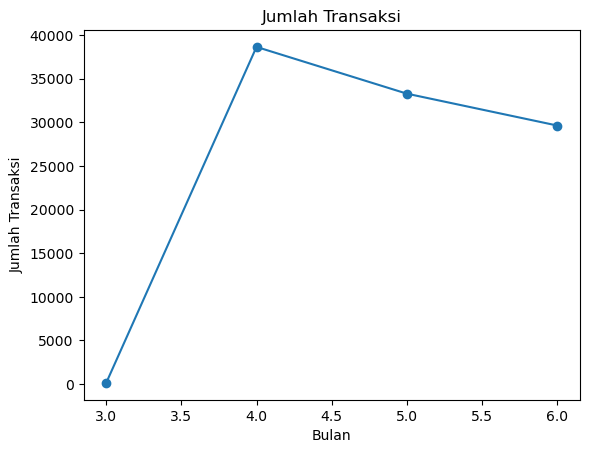

In [58]:
# plot jumlah pesanan per bulan
plt.plot(jumlah_transaksi_per_bulan.index,jumlah_transaksi_per_bulan.values, marker='o');

# menambahkan judul
plt.title('Jumlah Transaksi')

# menmbahkan label sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi');

- Dari sini kita mengetahui sempat terjadi peningkatan jumlah transaksi pada bulan ke-4 (April). Kemudian terjadi tren penurunan di 2 bulan berikutnya.

- Sebagai informasi, pada April, sejumlah daerah di India mengadakan festival perayaan Tahun Baru. Acaranya berlangsung di seluruh negeri meskipun namanya berbeda tiap daerah, seperti Gudi Padwa di Maharashtra. 

- Biasanya pada saat itu, ada peningkatan penjualan, khususnya pakaian yang dipakai untuk perayaan.

- Berikut link informasi selengkapnya: https://www.aboutamazon.in/news/retail/ugadi-vishu-gudi-padwa-essentials-on-amazon

## Sales Volume by Product Category

Dari sini, kita bisa melihat sales volume tiap produknya sekaligus melihat proporsinya masing-masing kategori.

In [59]:
# mencari tahu jumlah kemunculan masing-masing kategori tiap transaksi
transaksi_df['Category'].value_counts()

Category
Set              42261
Kurta            42067
Western Dress    13275
Top               9219
Ethnic Dress       989
Blouse             794
Bottom             375
Saree              142
Dupatta              3
Name: count, dtype: int64

Mari kita lihat bagaimana grafik sales volume saat kita masukkan ke bar chart.

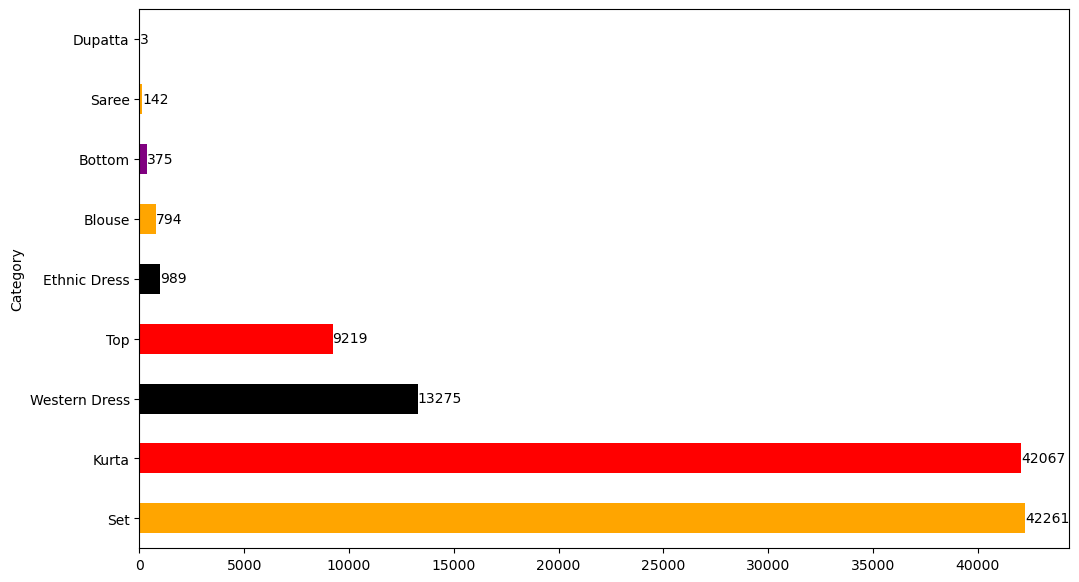

In [60]:
# mengatur ukuran figure
plt.figure(figsize=(12,7))

# membuat bar chart dan menambahkan warnanya
ax =transaksi_df['Category'].value_counts().plot(kind='barh', color = ['orange', 'red', 'black', 'red','black', 'orange', 'purple']);

# menambahkan label
ax.bar_label(ax.containers[0]);

- Tampak kurta (pakaian tradisional yang mirip sepert gamis, tetapi hanya sampai selutut) menjadi kategori yang terbanyak dibeli. Umumnya dipakai oleh pria.

- Begitu pula dengan set, yakni pakaian tradisional yang biasanya merujuk pada salwar kameez set atau lehenga choli set yang biasanya dipakai wanita India.

- Sebagai informasi memang seiring dengan menurunnya penggunaan saree untuk pakaian sehari-hari, pemakaian set (setelan) salwar bagi perempuan kian meningkat.

- Informasi lengkapnya silakan klik link berikut.
https://timesofindia.indiatimes.com/city/ahmedabad/demand-for-saris-in-cities-halves-in-a-decade/articleshow/93197217.cms 

Selain menggunakan bar chart, saya juga menampilkan data dengan pie chart untuk mengetahui proporsi tiap-tiap kategori produk.

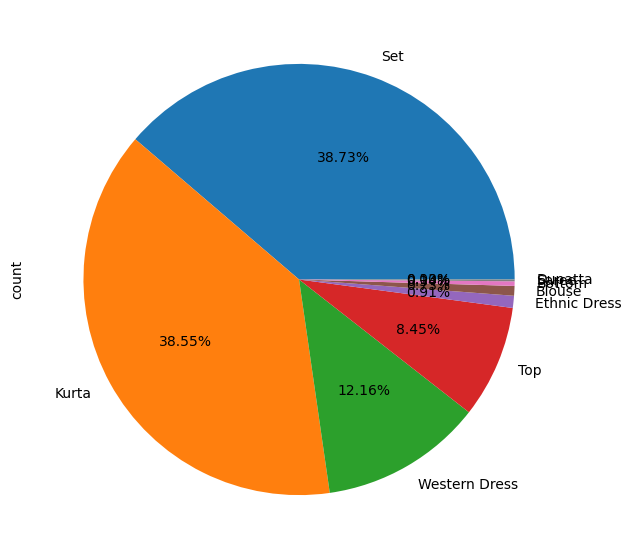

In [61]:
# mengatur ukuran figure
plt.figure(figsize=(9,7))

# membuat bar chart dan menambahkan warnanya
ax =transaksi_df['Category'].value_counts().plot(kind='pie', autopct='%.2f%%');

- Tampak kurta dan set menjadi mendominasi sales volume dengan akumulasi lebih dari 77 persen. Adapun sisanya kategori lain seperti atasan (Top), western dress, dan lainnya.

- Dengan begini, kita bisa susun strategi pemasaran. Salah satunya memfokuskan upaya marketing pada produk-produk yang penjualannya tinggi.

## Sales Volume by Time Period

Kita dapat melihat tren penjualan baik menurun atau meningkatnya penjualan dari periode waktu tertentu, dalam konteks ini tiap bulannya.

In [62]:
# menghitung volume by time period
vol_by_period = transaksi_df.groupby('Month')['Qty'].sum()
vol_by_period

Month
3      152
4    41594
5    35809
6    31919
Name: Qty, dtype: int64

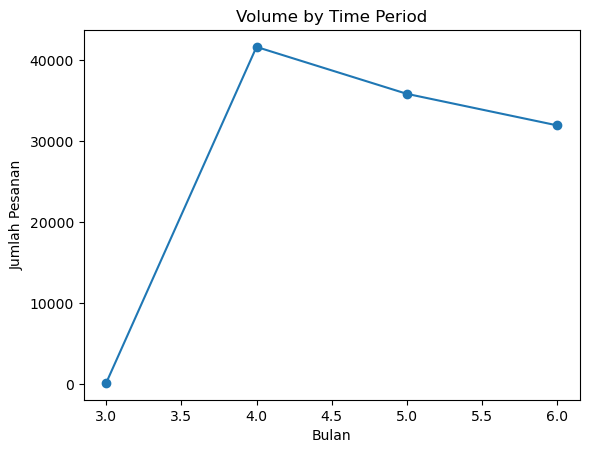

In [63]:
# membuat plotnya
plt.plot(vol_by_period.index, vol_by_period.values, marker='o')

# menambahkan judul
plt.title('Volume by Time Period')

# menmbahkan label sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan');

- Bulan ke-4 (April) merupakan peak season sejauh ini. Sales volume bahkan melebihi 40 ribu item. 

- Akan tetapi jumlahnya turun perlahan di bulan-bulan berikutnya.

## Sales Volume by Location

Pada bagian ini, kita akan mencari tahu sales volume pada tiap-tiap state (negara bagian) di India dan insight apa yang bisa kita ketahui.

In [64]:
# menghitung tiap values pada ship-state
transaksi_df['ship-state'].value_counts()

ship-state
Maharashtra           19001
Karnataka             14856
Tamil Nadu             9763
Telangana              9577
Uttar Pradesh          8890
Delhi                  6014
Kerala                 5364
West Bengal            5007
Andhra Pradesh         4506
Gujarat                3846
Haryana                3778
Rajasthan              2319
Madhya Pradesh         2123
Odisha                 1773
Bihar                  1751
Punjab                 1649
Assam                  1398
Uttarakhand            1301
Jharkhand              1203
Goa                     999
Chhattisgarh            775
Himachal Pradesh        631
Jammu & Kashmir         577
Puducherry              295
Chandigarh              291
Manipur                 278
Andaman & Nicobar       211
Sikkim                  172
Meghalaya               172
Nagaland                165
Tripura                 128
Arunachal Pradesh       127
Mizoram                  62
Dadra And Nagar          58
Ladakh                   36
Unknown  

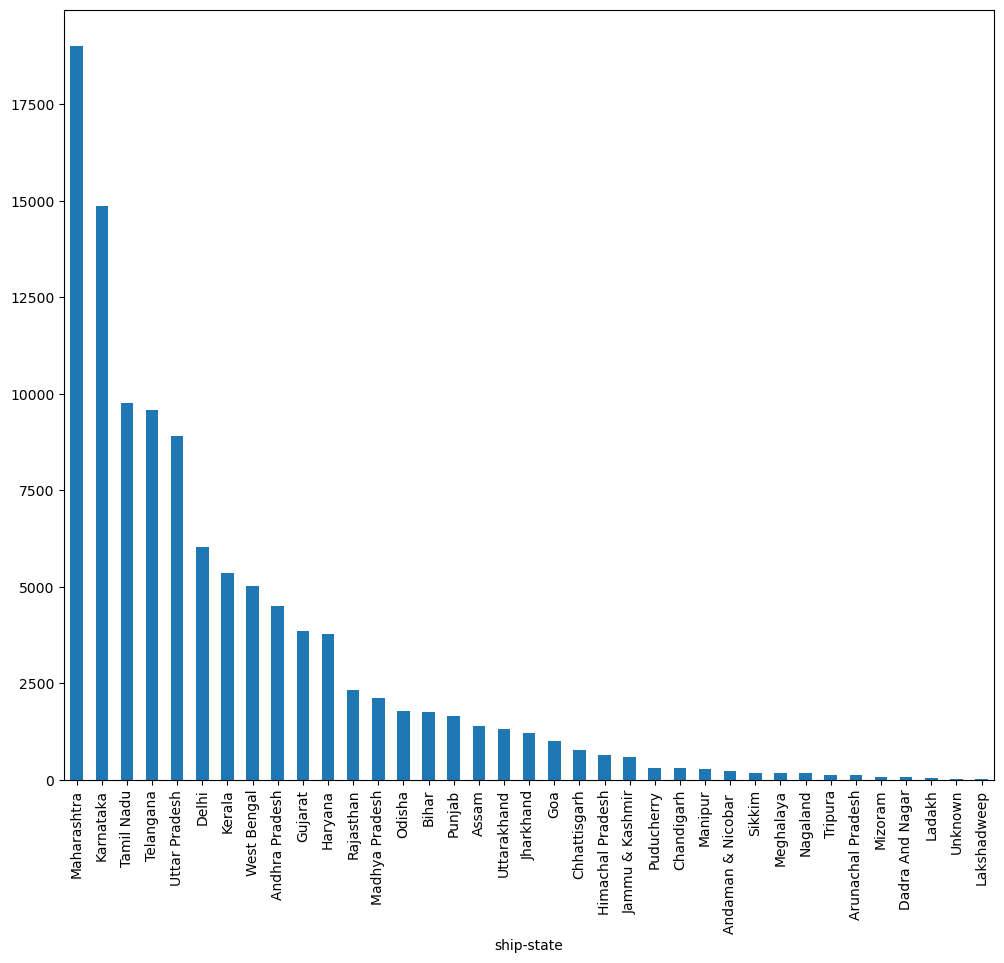

In [65]:
# mengatur ukuran figure
plt.figure(figsize=(12,10))

# membuat bar chart dan menambahkan warnanya
ax = transaksi_df['ship-state'].value_counts().plot(kind='bar')

- Maharashtra menjadi negara dengan sales volume terbanyak. Bukan tanpa alasan, Maharashtra merupakan negara bagian (state) dengan ekonomi terbesar di India.

- Begitu pula dengan Kamataka yang terdapat pusat TI dan startup, Banglore, yang juga dikenal sebagai Silicon Valley India.

- Maka dari itu, maklum jika masyarakat kedua negara bagian itu (khusunya di perkotaan) lebih sejahtera dan memiliki daya beli yang lebih tinggi dibanding negara bagian lainnya.

# Pengambilan Kesimpulan

- Kategori maupun jenis produk sangat mempengaruhi jumlah transaksi.

- Kategori produk unggulan seperti set dan kurta menjadi komoditas yang perlu dipertimbangkan untuk dilakukan strategi pemasaran.

- Adapun produk-produk yang memiliki sales volume lebih kecil sebaiknya disesuaikan pengadaan maupun produksinya.

- Ada 4 faktor yang mempengaruhi jumlah transaksi. Salah satunya jenis pengiriman cepat. Layanan ini bahkan disebut-sebut mempengaruhi kepuasan pelanggan. Maka itu, perlu dikaji lagi untuk kemudian diterapkan dalam strategi pemasaran.

- Mengenai kebiasaan customer, kita bisa manfaatkan. Misalnya, customer yang melakukan total belanjanya di atas rata-rata bisa kita berikan penawaran menarik.

- Kita bisa memanfaatkan momen-momen perayaan atau hari spesial untuk mendongkrak omzet melalui program menarik.

- Secara geografis, kita juga bisa memberikan lebih banyak kemudahan di daerah-daerah yang memiliki daya beli tinggi. Contohnya gratis ongkir.

- `Jika wawasan ini ditindaklanjuti menjadi strategi pemasaran niscaya kita bisa meningkatkan jumlah transaksi sebanyak 20 persen pada 6 bulan kemudian.`